<a href="https://colab.research.google.com/github/bhushanbkt/Fabric_Defect_Detection/blob/main/Fabric_Defect_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload the kaggle.json file that you downloaded
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download -d priemshpathirana/fabric-stain-dataset

 98% 409M/415M [00:06<00:00, 64.8MB/s]
100% 415M/415M [00:06<00:00, 62.6MB/s]


In [1]:
# import zipfile
# import os

# # Specify the path to the downloaded zip file
# zip_file_path = '/content/fabric-stain-dataset.zip'

# # Specify the directory to extract the contents
# extracted_path = '/content/drive/MyDrive'

# # Extract the contents of the zip file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extracted_path)

# # List the files in the extracted directory
# os.listdir(extracted_path)


EDA

In [1]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import tensorflow as tf
from tensorflow.keras import layers
import os

In [2]:

def load_images(folder_path):
    image_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(('.jpg', '.jpeg', '.png'))]
    images = [cv2.imread(path) for path in image_paths]
    return images

# Specify the paths to the image folders
defective_folder = "/content/drive/MyDrive/Dataset/Fabric_img/stain"
defect_free_folder = "/content/drive/MyDrive/Dataset/Fabric_img/defect_free"

# Load images
defective_images = load_images(defective_folder)
defect_free_images = load_images(defect_free_folder)



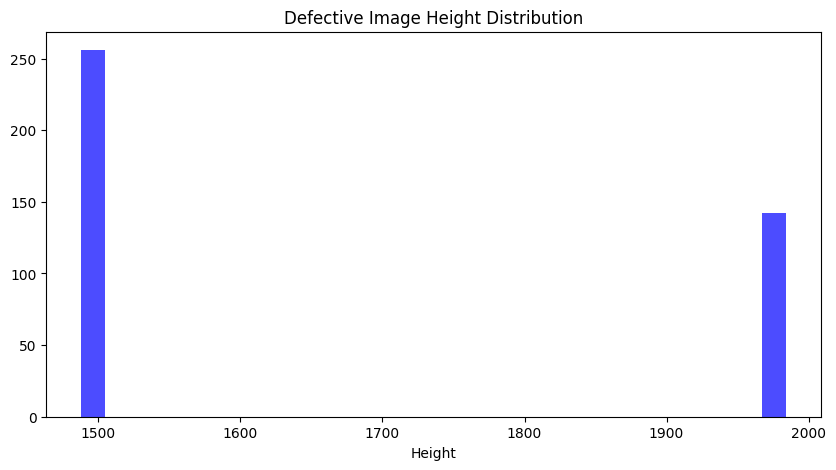

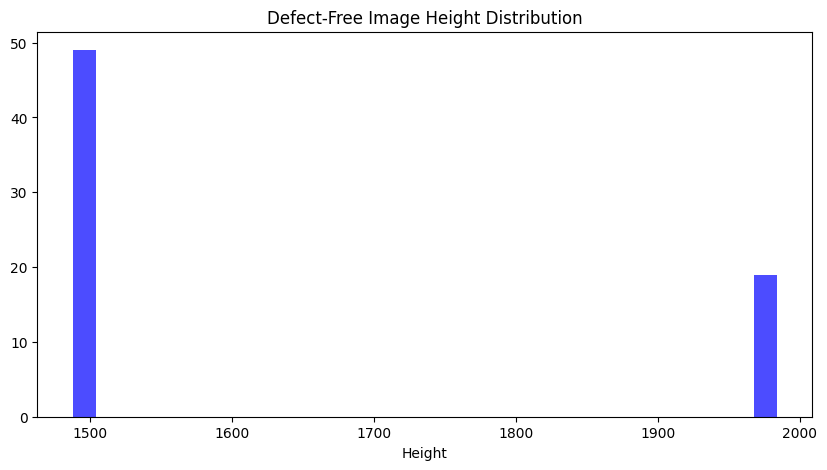

In [3]:


def plot_image_distribution(images, title):
    plt.figure(figsize=(10, 5))
    plt.hist([img.shape[0] for img in images], bins=30, color='blue', alpha=0.7)
    plt.title(f'{title} Image Height Distribution')
    plt.xlabel('Height')
    plt.show()

# Plot image distribution
plot_image_distribution(defective_images, 'Defective')
plot_image_distribution(defect_free_images, 'Defect-Free')


In [4]:
def display_sample_images(images, title, num_samples=3):
    plt.figure(figsize=(15, 5))
    plt.suptitle(f'Sample {title} Images', fontsize=16)

    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.axis('off')

    plt.show()



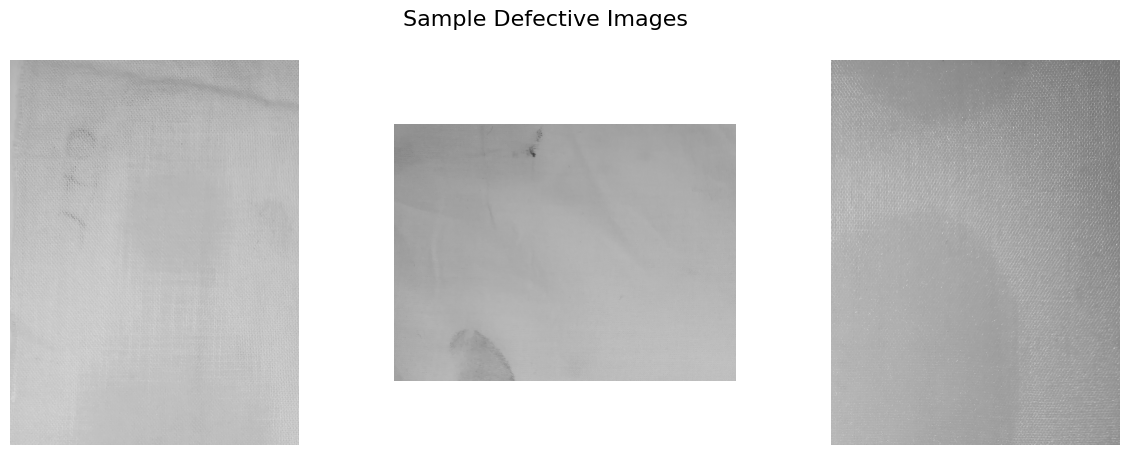

In [5]:
display_sample_images(defective_images, 'Defective')

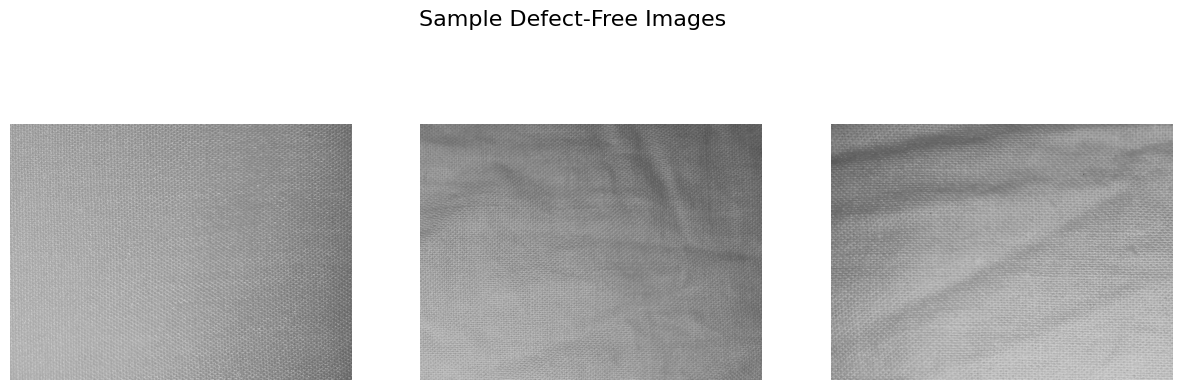

In [6]:
display_sample_images(defect_free_images, 'Defect-Free')

Data preprocessing

In [3]:

# annotations images_folder
defect_free_annotations_folder = '/content/drive/MyDrive/Dataset/Fabric_img/Annot/defect_free'
defect_free_images_folder = '/content/drive/MyDrive/Dataset/Fabric_img/defect_free'

strain_annotations_folder = '/content/drive/MyDrive/Dataset/Fabric_img/Annot/stain'
strain_images_folder = '/content/drive/MyDrive/Dataset/Fabric_img/stain'

# Function to read annotations
def read_annotations_and_images(annotations_folder, images_folder):
    data = []
    for filename in os.listdir(annotations_folder):
        if filename.endswith(".txt"):
            annotation_file_path = os.path.join(annotations_folder, filename)
            image_file_path = os.path.join(images_folder, filename.replace(".txt", ".jpg"))

            with open(annotation_file_path, 'r') as annotation_file:
                # Read the content of the annotation file
                annotation_content = annotation_file.read()

                # Append a tuple containing image filename and its annotation
                data.append((image_file_path, annotation_content))
    return data

# Read annotations and images
defect_free_data = read_annotations_and_images(defect_free_annotations_folder, defect_free_images_folder)

strain_data = read_annotations_and_images(strain_annotations_folder, strain_images_folder)



In [8]:
strain_data

[('/content/drive/MyDrive/Dataset/Fabric_img/stain/316.jpg',
  '0 0.776210 0.662970 0.447581 0.081317\n'),
 ('/content/drive/MyDrive/Dataset/Fabric_img/stain/85.jpg',
  '0 0.209929 0.188508 0.382560 0.375672\n0 0.807460 0.204301 0.302419 0.403226\n'),
 ('/content/drive/MyDrive/Dataset/Fabric_img/stain/69.jpg',
  '0 0.554940 0.192204 0.134073 0.383065\n0 0.048387 0.176075 0.095766 0.350806\n'),
 ('/content/drive/MyDrive/Dataset/Fabric_img/stain/379.jpg',
  '0 0.631300 0.611559 0.022681 0.033602\n'),
 ('/content/drive/MyDrive/Dataset/Fabric_img/stain/298.jpg',
  '0 0.488575 0.154738 0.322581 0.308468\n0 0.130040 0.833669 0.258737 0.203629\n0 0.880376 0.884829 0.142473 0.176915\n'),
 ('/content/drive/MyDrive/Dataset/Fabric_img/stain/300.jpg',
  '0 0.498656 0.234375 0.370968 0.216734\n0 0.686828 0.533014 0.360215 0.203125\n0 0.643145 0.936996 0.202957 0.126008\n0 0.180780 0.896673 0.348118 0.204637\n'),
 ('/content/drive/MyDrive/Dataset/Fabric_img/stain/137.jpg',
  '0 0.734375 0.223454 0.4

In [9]:
defect_free_data

[('/content/drive/MyDrive/Dataset/Fabric_img/defect_free/19.jpg', ''),
 ('/content/drive/MyDrive/Dataset/Fabric_img/defect_free/67.jpg', ''),
 ('/content/drive/MyDrive/Dataset/Fabric_img/defect_free/57.jpg', ''),
 ('/content/drive/MyDrive/Dataset/Fabric_img/defect_free/65.jpg', ''),
 ('/content/drive/MyDrive/Dataset/Fabric_img/defect_free/28.jpg', ''),
 ('/content/drive/MyDrive/Dataset/Fabric_img/defect_free/6.jpg', ''),
 ('/content/drive/MyDrive/Dataset/Fabric_img/defect_free/32.jpg', ''),
 ('/content/drive/MyDrive/Dataset/Fabric_img/defect_free/42.jpg', ''),
 ('/content/drive/MyDrive/Dataset/Fabric_img/defect_free/45.jpg', ''),
 ('/content/drive/MyDrive/Dataset/Fabric_img/defect_free/9.jpg', ''),
 ('/content/drive/MyDrive/Dataset/Fabric_img/defect_free/2.jpg', ''),
 ('/content/drive/MyDrive/Dataset/Fabric_img/defect_free/61.jpg', ''),
 ('/content/drive/MyDrive/Dataset/Fabric_img/defect_free/3.jpg', ''),
 ('/content/drive/MyDrive/Dataset/Fabric_img/defect_free/37.jpg', ''),
 ('/conten

In [4]:

def prepare_classification_data(data, label):
    image_paths = [item[0] for item in data]
    labels = [label] * len(data)
    return image_paths, labels

# Prepare data  images
defect_free_image_paths, defect_free_labels = prepare_classification_data(defect_free_data, label=0)

strain_image_paths, strain_labels = prepare_classification_data(strain_data, label=1)

# Concatenate the data
all_image_paths = defect_free_image_paths + strain_image_paths
all_labels = defect_free_labels + strain_labels



In [5]:
len(all_labels)

466

In [12]:
len(all_image_paths)

466

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_image_paths, val_image_paths, train_labels, val_labels = train_test_split(
    all_image_paths, all_labels, test_size=0.2, random_state=42
)




In [14]:
len(val_image_paths),len(train_image_paths)

(94, 372)

In [15]:
len(val_labels),len(train_labels)

(94, 372)

Model building (CNN)

In [16]:

# Model with TensorFlow (Keras)
import tensorflow as tf
from tensorflow.keras import layers


model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])



In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [8]:
# Function to load and preprocess images
def load_and_preprocess_image(image_path, label):
    image = tf.image.decode_jpeg(tf.io.read_file(image_path), channels=3)
    image = tf.image.resize(image, (224, 224))
    image = image / 255.0
    return image, label

In [11]:
# Apply the preprocessing function
train_dataset = tf.data.Dataset.from_tensor_slices((train_image_paths, train_labels))
train_dataset = train_dataset.map(load_and_preprocess_image)

val_dataset = tf.data.Dataset.from_tensor_slices((val_image_paths, val_labels))
val_dataset = val_dataset.map(load_and_preprocess_image)



In [20]:
#  model
model.fit(train_dataset.batch(32), epochs=7, validation_data=val_dataset.batch(32))


Epoch 1/7
12/12 [==============================] - 34s 3s/step - loss: 7.2816 - accuracy: 0.7688 - val_loss: 1.1416 - val_accuracy: 0.8511
Epoch 2/7
12/12 [==============================] - 31s 2s/step - loss: 1.9342 - accuracy: 0.7312 - val_loss: 0.7619 - val_accuracy: 0.8511
Epoch 3/7
12/12 [==============================] - 34s 3s/step - loss: 0.5350 - accuracy: 0.8414 - val_loss: 0.4386 - val_accuracy: 0.8511
Epoch 4/7
12/12 [==============================] - 30s 2s/step - loss: 0.4138 - accuracy: 0.8548 - val_loss: 0.4375 - val_accuracy: 0.8511
Epoch 5/7
12/12 [==============================] - 31s 3s/step - loss: 0.4255 - accuracy: 0.8656 - val_loss: 0.4949 - val_accuracy: 0.8511
Epoch 6/7
12/12 [==============================] - 30s 2s/step - loss: 0.4025 - accuracy: 0.8575 - val_loss: 0.4539 - val_accuracy: 0.8191
Epoch 7/7
12/12 [==============================] - 32s 3s/step - loss: 0.3931 - accuracy: 0.8629 - val_loss: 0.4381 - val_accuracy: 0.8404


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense




model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model (you should compile before saving)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (you should train before saving)
# model.fit(x_train, y_train, epochs=5, batch_size=32)
model.fit(train_dataset.batch(32), epochs=5, validation_data=val_dataset.batch(32))

# Save the model to a file in TensorFlow SavedModel format
model.save('/content/drive/MyDrive/Cancer', save_format='tf')


Epoch 1/5
12/12 [==============================] - 35s 2s/step - loss: 7.8412 - accuracy: 0.6505 - val_loss: 0.6610 - val_accuracy: 0.8511
Epoch 2/5
12/12 [==============================] - 31s 3s/step - loss: 0.5190 - accuracy: 0.8548 - val_loss: 0.5112 - val_accuracy: 0.8511
Epoch 3/5
12/12 [==============================] - 25s 2s/step - loss: 0.4427 - accuracy: 0.8548 - val_loss: 0.4345 - val_accuracy: 0.8511
Epoch 4/5
12/12 [==============================] - 29s 2s/step - loss: 0.4233 - accuracy: 0.8548 - val_loss: 0.4296 - val_accuracy: 0.8511
Epoch 5/5
12/12 [==============================] - 29s 2s/step - loss: 0.4135 - accuracy: 0.8548 - val_loss: 0.4230 - val_accuracy: 0.8511


In [21]:
import os
#path
test_dir = '/content/drive/MyDrive/Dataset/Fabric_img/test'


# list of image paths and corresponding labels
strain_test_paths = [os.path.join(test_dir, 'strain', img) for img in os.listdir(os.path.join(test_dir, 'strain'))]
strain_test_labels = [1] * len(strain_test_paths)  #  1 represents 'strain'


defect_free_test_paths = [os.path.join(test_dir, 'defect_free', img) for img in os.listdir(os.path.join(test_dir, 'defect_free'))]
defect_free_test_labels = [0] * len(defect_free_test_paths)  # 0 represents 'defect-free'

# Combine the two sets of paths and labels
test_image_paths = strain_test_paths + defect_free_test_paths
test_labels = strain_test_labels + defect_free_test_labels

# Create a tf.data.Dataset for the test set
test_dataset = tf.data.Dataset.from_tensor_slices((test_image_paths, test_labels))
test_dataset = test_dataset.map(load_and_preprocess_image)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset.batch(32))

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")




3/3 [==============================] - 9s 2s/step - loss: 0.3825 - accuracy: 0.8732
Test Accuracy: 87.32%


In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image

# image path
new_image_path = '/content/drive/MyDrive/Dataset/Fabric_img/stain/10.jpg'

# Load and preprocess the new image
new_image = image.load_img(new_image_path, target_size=(224, 224))
new_image_array = image.img_to_array(new_image)
new_image_array = np.expand_dims(new_image_array, axis=0)
new_image_array /= 255.0

# predictions using the trained model
predictions = model.predict(new_image_array)


# predicted_class = int(predictions[0] > 0.6)
predicted_class = int(predictions[0] > 0.5)


# Display the result
if predicted_class == 0:
    print("Predicted class: Defect-Free")
else:
    print("Predicted class: Defective")


1/1 [==============================] - 0s 127ms/step
Predicted class: Defective


In [23]:
predictions

array([[0.8231302]], dtype=float32)

In [26]:
# Save the model in the SavedModel format
export_dir = '/content/drive/MyDrive/Dataset'
tf.saved_model.save(model, export_dir)

# Load the model
loaded_model = tf.saved_model.load(export_dir)

In [25]:
# model.save_weights("Fabric_model.h5")

In [27]:
# Save model
model.save('/content/drive/MyDrive/Cancer', save_format='tf')

# Load model
# model = tf.keras.models.load_model('')


In [29]:
tf.__version__


'2.14.0'